# Sample data

In [ ]:
import os
import shutil

source_dir = '../final_embeddings/UP000008225_9483.fasta'
destination_dir = 'input/UP000008225_9483.fasta'
files_copied = 0
max_files = 10

# Ensure the destination directory exists
os.makedirs(destination_dir, exist_ok=True)

# Walk through the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        source_file = os.path.join(root, file)
        print(source_file)
        destination_file = os.path.join(destination_dir, file)
        shutil.copy(source_file, destination_file)
        files_copied += 1
        if files_copied >= max_files:
            break
    if files_copied >= max_files:
        break

print(f"Copied {files_copied} files to {destination_dir}")

# Writing uniprot ids to file

In [40]:
import os

In [41]:
parent_dir = "/home/gluetown/brain/final_embeddings/"  
result = {dir: [] for dir in os.listdir(parent_dir)}
for root, dirs, files in os.walk(parent_dir, topdown=True):
    for name in files:
        print(name)

tr|A0A2F0B768|A0A2F0B768_ESCRO Olfactory receptor 52B4 (Fragment) OS=Eschrichtius robustus OX=9764 GN=ESR_25751 PE=4 SV=1.pt
tr|A0A2F0B8X1|A0A2F0B8X1_ESCRO Alpha-centractin (Fragment) OS=Eschrichtius robustus OX=9764 GN=ESR_05811 PE=3 SV=1.pt
tr|A0A2F0BKJ4|A0A2F0BKJ4_ESCRO Protein FAM171A1 (Fragment) OS=Eschrichtius robustus OX=9764 GN=ESR_19016 PE=3 SV=1.pt
tr|A0A2F0B7S5|A0A2F0B7S5_ESCRO DDRGK domain-containing protein 1 (Fragment) OS=Eschrichtius robustus OX=9764 GN=ESR_16140 PE=4 SV=1.pt
tr|A0A2F0AVP4|A0A2F0AVP4_ESCRO E3 ubiquitin-protein ligase (Fragment) OS=Eschrichtius robustus OX=9764 GN=ESR_09925 PE=3 SV=1.pt
tr|A0A2F0AXY8|A0A2F0AXY8_ESCRO Olfactory receptor (Fragment) OS=Eschrichtius robustus OX=9764 GN=ESR_39336 PE=3 SV=1.pt
tr|A0A2F0BPE6|A0A2F0BPE6_ESCRO Fibroblast growth factor 10 (Fragment) OS=Eschrichtius robustus OX=9764 GN=ESR_40649 PE=4 SV=1.pt
tr|A0A2F0AWX9|A0A2F0AWX9_ESCRO Tropomodulin-2 (Fragment) OS=Eschrichtius robustus OX=9764 GN=ESR_14749 PE=4 SV=1.pt
tr|A0A2F0B

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import os
import regex as re

def create_uniref_clusters(parent_dir, uniref_dict, output_file):
    uniprot_uniref = {}
    
    for root, dirs, files in os.walk(parent_dir, topdown=True):
        for name in files:
            if name.endswith(".pt"):
                    # uniref_id = uniref_df.loc[uniref_df['UniProtKB-AC'] == uniprot_id, 'UniRef90'].values
                try:
                    print((root, name))
                    uniprot_id = name.split("|")[1]
                    uniref90_id = uniref_dict[uniprot_id]
                    uniprot_uniref[re.findall(r"(UP.*)", os.path.join(root, name))[0]] = uniref90_id
                    # if len(uniref_id) > 0:
                    # print(f"Uniprot: {uniprot_id}, UniRef90: {uniref90_id}")
                except:
                    pass

    uniprot_uniref_df = pd.DataFrame(uniprot_uniref.items(), columns=['File', 'UniRef90'])
    uniprot_uniref_df.to_csv(output_file, index=False)

    return uniprot_uniref


parent_dir = "/home/gluetown/brain/final_embeddings/"
uniref_table = "/home/gluetown/brain/github_stuff/idmapping_reduced.tsv.gz"
output_file = "/home/gluetown/brain/github_stuff/uniprot_uniref_mapped.csv"
uniref_df = pd.read_csv(uniref_table, sep="\t", compression='gzip', usecols=[0, 3], nrows=1000)
uniref_df.columns = ['UniProtKB-AC', 'UniRef90']
uniref_dict = pd.Series(uniref_df.UniRef90.values, index=uniref_df['UniProtKB-AC']).to_dict()


In [ ]:
create_uniref_clusters(parent_dir, uniref_dict, output_file)


In [ ]:
name = "tr|Q6GZX3|A0A2F0B768_ESCRO Olfactory receptor 52B4 (Fragment) OS=Eschrichtius robustus OX=9764 GN=ESR_25751 PE=4 SV=1.pt"
root = '/home/gluetown/brain/final_embeddings/UP000243164_9764.fasta'
uniprot_uniref = {}
uniprot_id = name.split("|")[1]
print(f"Uniprot: {uniprot_id}") #, UniRef90: {uniref_dict[uniprot_id]}")
uniref90_id = uniref_dict[uniprot_id]
uniprot_uniref[re.findall(r"(UP.*)", os.path.join(root, name))[0]] = uniref90_id
uniprot_uniref

# Reading in Data

In [ ]:
import torch
import numpy as np
import os
import pandas as pd
import regex as re

In [ ]:
def read_embeddings(input_file, names = False):
    dtype = np.float32
    input_file = 'output.dat'
    file_size = os.path.getsize(input_file)
    num_elements = file_size // np.dtype(dtype).itemsize
    if names: 
        output_array = np.memmap(input_file, dtype='S100', mode='r', shape=(num_elements,))
        return output_array
    else:
        output_array = np.memmap(input_file, dtype=dtype, mode='r', shape=(num_elements,))
        reshaped_array = output_array.reshape(output_array.size // 320, 320)
        return torch.from_numpy(reshaped_array)


In [ ]:
# input = read_embeddings("output.dat")
# names = read_embeddings("names.dat", names = True)
brainsize_data = pd.read_csv("../gyz043_suppl_Supplement_Data.csv")

In [ ]:
import os
import torch

def save_embedding(input_embeddings):
    tensors = {}
    for root, dirs, files in os.walk(input_embeddings, topdown=True):
        for name in files:
            data = torch.load(os.path.join(root, name))
            # Extract the relative path excluding the base directory
            relative_path = os.path.relpath(os.path.join(root, name), input_embeddings)
            tensors[relative_path] = data['mean_representations'][6]
    return tensors

In [ ]:
tensors = save_embedding("samples/")

# Clustering

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster


In [ ]:

flattened_tensors = [tensor.flatten() for tensor in tensors.values()]
distance_matrix = pdist(flattened_tensors, metric='euclidean')
linked = linkage(distance_matrix, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True ,
           labels=list(tensors.keys()))  # Use keys as labels
plt.title('Hierarchical Clustering Dendrogram (euclidean)')
plt.xlabel('Tensor')
plt.xticks(rotation=90)

plt.ylabel('Distance')
plt.show()

In [ ]:
num_clusters = 3
clusters = fcluster(linked, t=0.3, criterion='distance')

print("Clusters:", clusters)

In [ ]:
cluster_dict = {c:{} for c in range(1, len(set(clusters)))}   
# for c, t in zip(clusters, tensors.keys()):
#     cluster_dict[c][t] = tensors[t]

cluster_dict

In [ ]:
import os
import torch
import pandas as pd

def load_embeddings_by_cluster(cluster_num, input_dir):
    cluster_files = pd.read_csv('cluster_files.csv')
    file_list = cluster_files.loc[cluster_num].values
    tensors = {}
    dirs_list = set([i.split('/')[0] for i in file_list])
    
    print(f"Directories to search: {dirs_list}")
    print(f"Files to find: {file_list}")
    
    for root, dirs, files in os.walk(input_dir, topdown=True):
        print(f"Checking directory: {root}")
        dirs[:] = [d for d in dirs if d in dirs_list]
        print(f"Filtered directories: {dirs}")
        
        for name in files:
            relative_path = os.path.relpath(os.path.join(root, name), input_dir)
            print(f"{relative_path}")
            if relative_path in file_list:
                file_path = os.path.abspath(os.path.join(root, name))
                data = torch.load(file_path)
                tensors[relative_path] = data['mean_representations'][6]
    
    return tensors

# Example usage
cluster_1 = load_embeddings_by_cluster(1,'/home/gluetown/brain/final_embeddings/')

In [ ]:
cluster_1

In [ ]:
import os

# Define the file name
file_name = "tr|A0A075B5R8|A0A075B5R8_MOUSE Immunoglobulin heavy variable V11-2 (Fragment) OS=Mus musculus OX=10090 GN=Ighv11-2 PE=4 SV=1.pt"

# Define the directory to search in
directory = "final_embeddings/UP000081671_10020.fasta/"

# Construct the full path
file_path = os.path.join(directory, file_name)

# Check if the file exists
if os.path.exists(file_path):
    print(f"The file '{file_name}' exists in '{directory}'.")
else:
    print(f"The file '{file_name}' does not exist in '{directory}'.")

In [ ]:
file_list = ['UP000081671_10020.fasta/tr|A0A075B5R8|A0A075B5R8_MOUSE Immunoglobulin heavy variable V11-2 (Fragment) OS=Mus musculus OX=10090 GN=Ighv11-2 PE=4 SV=1.pt'
 'UP000081671_10020.fasta/sp|Q6ZQ18|EFR3B_MOUSE Protein EFR3 homolog B OS=Mus musculus OX=10090 GN=Efr3b PE=1 SV=2.pt'
 'UP000081671_10020.fasta/sp|Q9QZ04|MAGL2_MOUSE MAGE-like protein 2 OS=Mus musculus OX=10090 GN=Magel2 PE=1 SV=2.pt']
dirs_list = set([i.split('/')[0] for i in file_list])
dirs_list

In [ ]:
# Only saving clusters and file names

cluster_files = {c: list(cluster_dict[c].keys()) for c in cluster_dict}
df = pd.DataFrame.from_dict(cluster_files, orient='index').T
df.to_csv('cluster_files.csv', index=False)

cluster_files = pd.read_csv('cluster_files.csv')
cluster_files

In [ ]:
import os
import json

# Assuming cluster_dict is already created
cluster_dict = {c:{} for c in range(1, num_clusters+1)}
for c, t in zip(clusters, tensors.keys()):
    cluster_dict[c][t] = tensors[t]

# Create directories and save values
for key, value in cluster_dict.items():
    # Create directory named by the key
    dir_name = f'cluster_{key}'
    os.makedirs(dir_name, exist_ok=True)
    
    # Save each value in the directory
    for sub_key, sub_value in value.items():
        # Ensure the directory structure exists
        sub_dir = os.path.dirname(sub_key)
        full_dir_path = os.path.join(dir_name, sub_dir)
        os.makedirs(full_dir_path, exist_ok=True)
        
        # Convert Tensor to a serializable format
        serializable_value = sub_value.tolist() if hasattr(sub_value, 'tolist') else sub_value
        
        # Save the file
        file_path = os.path.join(dir_name, f'{sub_key}.json')
        with open(file_path, 'w') as f:
            json.dump(serializable_value, f)

In [ ]:
import os
import json
import torch

# def load_tensors_from_json(base_dir):
#     cluster_dict = {}        
#     for cluster_dir in os.listdir(base_dir):
#         cluster_path = os.path.join(base_dir, cluster_dir)
#         if os.path.isdir(cluster_path):
#             cluster_key = cluster_dir.split('.fasta')[0]
#             cluster_dict[cluster_key] = {}                
#             for json_file in os.listdir(cluster_path):
#                 if json_file.endswith('.json'):
#                     file_path = os.path.join(cluster_path, json_file)
#                     with open(file_path, 'r') as f:
#                         data = json.load(f)
#                         tensor = torch.tensor(data)
#                         sub_key = os.path.splitext(json_file)[0]
#                         cluster_dict[cluster_key][sub_key] = tensor


# Load all tensors from a single json file
import os
import json
import torch

def load_tensors_from_json(input_file='embeddings.json'):
    try:
        with open(input_file, 'r') as f:
            data = json.load(f)
    except json.JSONDecodeError as e:
        print(f"Error reading JSON file: {e}")
        return None
    
    tensors = {key: torch.tensor(value) for key, value in data.items()}
    return tensors

# Example usage
base_dir = 'embeddings.json'
tensors = load_tensors_from_json(base_dir)
if tensors is not None:
    print(tensors)

In [ ]:
import os
import json
import torch
import time

def load_tensors_from_json(input_file='embeddings.json'):
    start_time = time.time()
    tensors = {}
    try:
        with open(input_file, 'r') as file:
            tensors = json.load(file)
    except json.JSONDecodeError as e:
        print(f"Error reading JSON file: {e}")
        return None
    except FileNotFoundError as e:
        print(f"File not found: {e}")
        return None
    end_time = time.time()
    print(f"Time taken to load from JSON: {end_time - start_time} seconds")
    return tensors

def load_tensors_from_directory(input_dir):
    start_time = time.time()
    tensors = {}
    for root, dirs, files in os.walk(input_dir, topdown=True):
        for name in files:
            data = torch.load(os.path.join(root, name))
            tensors[os.path.join(root, name)] = data['mean_representations'][6]
    end_time = time.time()
    print(f"Time taken to load from directory: {end_time - start_time} seconds")
    return tensors

# Example usage
json_file = 'embeddings.json'
input_dir = 'samples/'

# Benchmark loading from JSON
tensors_from_json = load_tensors_from_json(json_file)

# Benchmark loading from directory
tensors_from_directory = load_tensors_from_directory(input_dir)

In [ ]:
import sys

memory_usage = sys.getsizeof(cluster_dict)
print("Memory usage of cluster_dict:", memory_usage, "bytes")

# Clustering

In [ ]:
import torch
import numpy as np
import os
import pandas as pd
import regex as re
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
import json
import sys
from datasketch import MinHash, MinHashLSH
from sklearn.cluster import DBSCAN

In [ ]:
import os
import torch
import h5py
import re

def save_embedding(input_embeddings, output_file):
    tensors = {}
    # output_file = os.path.join(output_dir, 'embeddings.h5')  # Use .h5 extension for HDF5 file
    
    for root, dirs, files in os.walk(input_embeddings, topdown=True):
        for name in files:
            data = torch.load(os.path.join(root, name))
            tensors[re.findall(r"UP.*", root)[0] + "/" + name] = data['mean_representations'][6]
    print(f"Loaded embeddings from {input_embeddings}") 

    if not os.path.exists(output_file):
        os.makedirs(output_file)

    # Save to HDF5 file
    with h5py.File(output_file, 'w') as f:
        for key, tensor in tensors.items():
            f.create_dataset(key, data=tensor.numpy())

    return tensors

# Example usage
# save_embedding("samples/", "test_embeddings/")


def load_embeddings(input_file):
    tensors = {}
    with h5py.File(input_file, 'r') as f:
        def recursively_load_group(group, prefix=''):
            for key in group.keys():
                item = group[key]
                if isinstance(item, h5py.Group):
                    recursively_load_group(item, prefix + key + '/')
                else:
                    tensors[prefix + key] = torch.tensor(item[()])

        recursively_load_group(f)
    return tensors

load_embeddings("test_embeddings/embeddings.h5")

def apply_lsh(tensors, num_perm=128, threshold=0.01):
    lsh = MinHashLSH(threshold=threshold, num_perm=num_perm)
    minhashes = {}
    for key, tensor in tensors.items():
        m = MinHash(num_perm=num_perm) # O(n)
        tensor_np = tensor.numpy()
        for val in tensor_np.flatten():
            m.update(val.tobytes())
        lsh.insert(key, m)
        minhashes[key] = m
    return lsh, minhashes

def apply_dbscan(minhashes, eps=1, min_samples=1):
    keys = list(minhashes.keys())
    vectors = np.array([minhashes[key].hashvalues for key in keys])
    
    # Apply DBSCAN
    db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean').fit(vectors)
    labels = db.labels_
    
    # Print labels for debugging
    print("DBSCAN Labels:", labels)
    
    # Create clusters dictionary
    clusters = {i: [] for i in set(labels) if i != -1}
    for key, label in zip(keys, labels):
        if label != -1:
            clusters[label].append(key)
    
    # Check if any clusters were found
    if not clusters:
        print("No clusters found. Try adjusting the eps and min_samples parameters.")
    
    return clusters

def dbscan_only(tensors, eps=2, min_samples=2):
    tensor_list = list(tensors.values())
    tensor_array = np.stack(tensor_list)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(tensor_array)
    result_dict = {key: label for key, label in zip(tensors.keys(), labels)}

    return result_dict

def load_tensors_from_json(input_file):
    with open(input_file, 'r') as f:
        content = f.read()
        print("File Content:\n", content)  # Debugging step to print file content
        
        try:
            data = json.loads(content)
        except json.JSONDecodeError as e:
            print(f"JSONDecodeError: {e}")
            return None
    
    tensors = {key: torch.tensor(value) for key, value in data.items()}
    return tensors

# Example usage
# Assuming minhashes is a dictionary of MinHash objects
# clusters = apply_dbscan(minhashes, eps=0.5, min_samples=5)

## Test set

### Test Set Visuals

In [ ]:
input_file = "../final_embeddings/UP000261680_29073.fasta/"
output_file = "test/UP000261680_29073_embeddings.h5"
test_tensors = save_embedding(input_file, output_file)
# # 20292 embeddings
# # 2 min. to load

# test_tensors = load_embeddings("test_embeddings/embeddings.h5")

In [ ]:
input_file = "samples/"
output_dir = "test/samples/"
test_tensors = save_embedding(input_file, output_dir)



In [ ]:
# Visualize ESM Embeddings and compare to dbscan clusters

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extract tensors and labels
labels = [i.split('|')[1] for i in test_tensors.keys()]
tensor_list = list(test_tensors.values())

# Stack the tensors into a single array
tensor_array = np.stack(tensor_list)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tensor_array)

# Plot the PCA results without the legend
plt.figure(figsize=(10, 7))
scatter_handles = []
for i, label in enumerate(labels):
    scatter = plt.scatter(pca_result[i, 0], pca_result[i, 1], label=label)
    scatter_handles.append(scatter)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Test Tensors')
plt.show()

# Create a separate figure for the legend
fig_legend = plt.figure(figsize=(10, 2))
fig_legend.legend(handles=scatter_handles, labels=labels, loc='center', ncol=5)
fig_legend.suptitle('Legend')
plt.axis('off')
plt.show()

In [ ]:
# Plot clusters

def plot_clusters(cluster, alg_title):
    plt.figure(figsize=(10, 7))
    scatter_handles = []
    labels = []
    for label, i in cluster.items():
        scatter = plt.scatter(i + np.random.uniform(-0.05, 0.05), 0, label=label)
        scatter_handles.append(scatter)
        labels.append(label)
    plt.xlabel('Cluster')
    plt.title(f'{alg_title} Clusters (jittered)')
    plt.show()

    # Create a separate figure for the legend
    fig_legend = plt.figure(figsize=(10, 2))
    fig_legend.legend(handles=scatter_handles, labels=labels, loc='center', ncol=5)
    fig_legend.suptitle('Legend')
    plt.axis('off')
    plt.show()

def plot_pca(tensors, cluster, alg_title):
    labels = [i.split('|')[1] for i in tensors.keys()]
    tensor_list = list(tensors.values())

    # Stack the tensors into a single array
    tensor_array = np.stack(tensor_list)

    # Perform PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(tensor_array)

    # Map cluster labels
    cluster_labels = [cluster[label] for label in labels]

    # Plot the PCA results with cluster labels
    plt.figure(figsize=(10, 7))
    scatter_handles = []
    unique_labels = set(cluster_labels)
    for label in unique_labels:
        indices = [i for i, l in enumerate(cluster_labels) if l == label]
        scatter = plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=label)
        scatter_handles.append(scatter)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(f'PCA with {alg_title} Clustering')
    plt.show()

    # Create a separate figure for the legend
    fig_legend = plt.figure(figsize=(10, 2))
    fig_legend.legend(handles=scatter_handles, labels=unique_labels, loc='center', ncol=5)
    fig_legend.suptitle('Legend')
    plt.axis('off')
    plt.show()
    

### DBSCAN

In [ ]:
def dbscan_only(tensors, eps=2, min_samples=2):
    tensor_list = list(tensors.values())
    tensor_array = np.stack(tensor_list)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(tensor_array)
    result_dict = {key: label for key, label in zip(tensors.keys(), labels)}
    return result_dict

In [ ]:
test_clusters = dbscan_only(test_tensors, eps=3, min_samples=5)
dbscan_clusters = {i.split('|')[1]: label for i, label in test_clusters.items()}
dbscan_clusters

plot_clusters(dbscan_clusters, 'DBSCAN')
plot_pca(test_tensors, dbscan_clusters, 'DBSCAN')
{k: v for k, v in sorted(dbscan_clusters.items(), key=lambda item: item[1])}

### HDBSCAN

In [ ]:
import numpy as np
from sklearn.cluster import HDBSCAN

def hdbscan_only(tensors, min_samples=2, min_cluster_size=5):
    tensor_list = list(tensors.values())
    tensor_array = np.stack(tensor_list)
    dbscan = HDBSCAN(min_samples, min_cluster_size)
    labels = dbscan.fit_predict(tensor_array)
    result_dict = {key: label for key, label in zip(tensors.keys(), labels)}

    return result_dict

test_hdbscan = hdbscan_only(test_tensors, min_cluster_size=2)
hdbscan_clusters = {i.split('|')[1]: label for i, label in test_hdbscan.items()}


plot_clusters(hdbscan_clusters, 'HDBSCAN')
plot_pca(test_tensors, hdbscan_clusters, 'HDBSCAN')

{k: v for k, v in sorted(hdbscan_clusters.items(), key=lambda item: item[1])}

### Hierarchical

In [ ]:
# Hierarchical

flattened_tensors = [tensor.flatten() for tensor in test_tensors.values()]
distance_matrix = pdist(flattened_tensors, metric='euclidean')
linked = linkage(distance_matrix, method='ward')
t = 4
clusters = fcluster(linked, t=t, criterion='distance')
clusters_dict = {}
for i, label in zip(clusters, test_tensors.keys()):
    clusters_dict[label.split('|')[1]] = i

plot_clusters(clusters_dict, 'Hierarchical')
plot_pca(test_tensors, clusters_dict, 'Hierarchical')

{k: v for k, v in sorted(clusters_dict.items(), key=lambda item: item[1])}

In [ ]:
hdbscan_clusters

### BIRCH

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import Birch

# Extract tensors and labels
labels = [i.split('|')[1] for i in test_tensors.keys()]
tensor_list = list(test_tensors.values())

# Stack the tensors into a single array
tensor_array = np.stack(tensor_list)

# Apply Birch clustering
birch = Birch(n_clusters=3)  # You can specify n_clusters if needed
birch.fit(tensor_array)
cluster_labels = birch.predict(tensor_array)

plot_clusters({label: cluster for label, cluster in zip(labels, cluster_labels)}, 'Birch')
plot_pca(test_tensors, {label: cluster for label, cluster in zip(labels, cluster_labels)}, 'Birch')

In [ ]:
cluster_labels

## Sensitivity hashing + DBSCAN

In [ ]:
# for i in np.arange(1, 3, 0.1):
#     test_ls, test_minhashes = apply_lsh(test_tensors, threshold=0.2)
#     test_clusters = apply_dbscan(test_minhashes, eps=i, min_samples=2)
#     print(len(test_clusters.keys()))
test_ls, test_minhashes = apply_lsh(test_tensors)
test_clusters = apply_dbscan(test_minhashes, eps=20, min_samples=2*320)
test_clusters

## Picking parameters

In [ ]:
# Finding the right parameters for DBSCAN

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

flattened_tensors = [tensor.flatten() for tensor in test_tensors.values()]
distances = pdist(flattened_tensors, metric='euclidean')

# Calculate the mean and median of the distances
mean_distance = np.mean(distances)
median_distance = np.median(distances)

# Recommend LSH threshold
lsh_threshold = median_distance  # or mean_distance

# Plot the k-distance graph to find a suitable eps for DBSCAN
k = 5  # You can adjust this value
nbrs = NearestNeighbors(n_neighbors=k).fit(distances.reshape(-1, 1))
distances_k, indices = nbrs.kneighbors(distances.reshape(-1, 1))

# Sort the distances to the k-th nearest neighbor
distances_k = np.sort(distances_k[:, k-1], axis=0)

# Plot the k-distance graph
plt.plot(distances_k)
plt.xlabel('Points')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.title('k-Distance Graph')
plt.show()

# Recommend DBSCAN parameters
dbscan_eps = median_distance  # or use the elbow point from the k-distance graph
dbscan_min_samples = 5  # Adjust based on your data

# Print recommended parameters
print(f'Recommended LSH threshold: {lsh_threshold}')
print(f'Recommended DBSCAN eps: {dbscan_eps}')
print(f'Recommended DBSCAN min_samples: {dbscan_min_samples}')

# Example of running DBSCAN with the recommended parameters
dbscan = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)
labels = dbscan.fit_predict(distances.reshape(-1, 1))

# Print the number of clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datasketch import MinHash, MinHashLSH

def calculate_precision(true_positives, false_positives):
    return true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0

def apply_lsh(embeddings, num_perm=128, threshold=0.01):
    lsh = MinHashLSH(threshold=threshold, num_perm=num_perm)
    minhashes = {}
    for key, embedding in embeddings.items():
        m = MinHash(num_perm=num_perm)
        for val in embedding.flatten():
            m.update(val.tobytes())
        lsh.insert(key, m)
        minhashes[key] = m
    return lsh, minhashes

def evaluate_precision(embeddings, ground_truth, num_permutations, threshold=0.01):
    precisions = []
    for num_perm in num_permutations:
        lsh, minhashes = apply_lsh(embeddings, num_perm=num_perm, threshold=threshold)
        true_positives = 0
        false_positives = 0
        for key, m in minhashes.items():
            result = lsh.query(m)
            true_positives += len(set(result) & set(ground_truth[key]))
            false_positives += len(set(result) - set(ground_truth[key]))
        precision = calculate_precision(true_positives, false_positives)
        precisions.append(precision)
    return precisions

# Example ESM embeddings and ground truth
# embeddings = {'seq1': np.array([...]), 'seq2': np.array([...]), ...}
# ground_truth = {'seq1': ['seq2', 'seq3'], 'seq2': ['seq1'], ...}

# Define the range of permutations to test
num_permutations = [16, 32, 64, 128, 256]

# Evaluate precision for each number of permutations
precisions = evaluate_precision(embeddings, ground_truth, num_permutations)

# Plot the precision against the number of permutations
plt.figure(figsize=(10, 6))
plt.plot(num_permutations, precisions, marker='o')
plt.xlabel('Number of Permutations')
plt.ylabel('Precision')
plt.title('Precision vs. Number of Permutations in LSH')
plt.grid(True)
plt.show()

In [ ]:
# input_file = "samples/"
input_file = "/home/gluetown/brain/final_embeddings/UP000000589_10090.fasta/" # 21752 files
output_dir="/home/gluetown/brain/test_set/clusters/"
tensors = save_embedding(input_file, output_dir = output_dir + input_file.split('/')[-2])
tensors

## 44 sec to load 21752 files

In [ ]:
tensors

In [ ]:
lsh, minhashes = apply_lsh(tensors)
# print(lsh)
# print(minhashes)

# 4 min. LSH + DBSCAN

In [ ]:
cluster = apply_dbscan(minhashes)
cluster, len(cluster.keys())

In [ ]:
clusters = dbscan_only(tensors)
len(clusters.keys())

In [ ]:
test_clusters = dbscan_only(test_tensors, eps=2, min_samples=2)
test_clusters

In [ ]:
x = 'UP000081671_10020.fasta/sp|Q3UQN2|FCHO2_MOUSE F-BAR domain only protein 2 OS=Mus musculus OX=10090 GN=Fcho2 PE=1 SV=1.pt'
x.split('|')[1]

# Data Organization

In [ ]:
import pandas as pd
import csv
import time
import regex as re
import os

def double_lookup(val, dict1, dict2):
    try:
        return dict2[dict1[val]]
    except KeyError:
        return None
    
def load_csv_into_dict(input_file):
    data_dict = {}
    with open(input_file, "r") as f:
        reader = csv.reader(f, delimiter=',', quotechar="'")        
        for row in reader:
            key = row[0]
            value = row[1]
            data_dict[key] = value
    return data_dict

# def load_df(input_file):
#     data = pd.read_csv(input_file, header = None)
#     return dict(zip(data[0], data[1]))

def load_csv_into_df(input_file):
    rows = []
    with open(input_file, "r") as f:
        reader = csv.reader(f, delimiter=',', quotechar="'")
        for row in reader:
            rows.append(row)
    
    # Convert the list of rows into a DataFrame
    df = pd.DataFrame(rows, columns=['key', 'value'])
    return df
    


# time3 = time.time()
# time4 = time.time()

# print(f"Time taken for csv.reader: {time2 - time1} seconds")
# print(f"Time taken for pandas: {time4 - time3} seconds")

In [52]:
uniprot_species = load_csv_into_dict("/home/gluetown/brain/clusters/uniprot_species.csv")
filenames_uniprot = load_csv_into_dict("/home/gluetown/brain/clusters/filenames_uniprot_id.csv")
# uniprot_uniref = load_csv_into_dict("/home/gluetown/brain/uniref/uniref90_mapped.csv")    
uniprot_species_df = pd.DataFrame(list(uniprot_species.items()), columns=['uniprot_id', 'species_id'])
filenames_uniprot_df = pd.DataFrame(list(filenames_uniprot.items()), columns=['uniprot_id', 'filename'])
brainsize_data = pd.read_csv("../data/gyz043_suppl_Supplement_Data.csv")
up_id_species = pd.read_csv("../clusters/up_id_species.csv", header=None)
up_id_species.columns = ['species_id', 'Binomial']
brainsize_data['Binomial'] = brainsize_data['Binomial'].str.lower()
# uniprot_uniref_df = pd.DataFrame(list(uniprot_uniref.items()), columns=['uniprot_id', 'uniref_id'])

merged_df = pd.merge(filenames_uniprot_df, uniprot_species_df, how='outer', on='uniprot_id') #.merge(uniprot_uniref_df, how='outer', on='uniprot_id')
merged_df = pd.merge(merged_df, up_id_species, how = "outer", on = "species_id")
merged_df = pd.merge(merged_df, brainsize_data[["Binomial", "Brain.resid"]], how = "left", on = "Binomial")
filtered_species = os.listdir("../final_embeddings/")
merged_df = merged_df.loc[merged_df["species_id"].isin(filtered_species)]
merged_df.to_csv("../data/metadata.csv", index=False)
merged_df.head()

,uniprot_id,filename,species_id,Binomial,Brain.resid
0,A0A075B5I0,final_embeddings/UP000000589_10090.fasta/tr|A0...,UP000000589_10090.fasta,mus_musculus,-0.022205
1,A0A075B5I2,final_embeddings/UP000000589_10090.fasta/tr|A0...,UP000000589_10090.fasta,mus_musculus,-0.022205
2,A0A075B5J4,final_embeddings/UP000000589_10090.fasta/tr|A0...,UP000000589_10090.fasta,mus_musculus,-0.022205
3,A0A075B5J6,final_embeddings/UP000000589_10090.fasta/tr|A0...,UP000000589_10090.fasta,mus_musculus,-0.022205
4,A0A075B5J9,final_embeddings/UP000000589_10090.fasta/tr|A0...,UP000000589_10090.fasta,mus_musculus,-0.022205


In [ ]:
time1 = time.time()

items_in_cluster = [key for key, value in uniprot_uniref.items() if value == "UniRef90_A0A3Q2H3W0"]
genes_in_cluster = [filenames_uniprot[uniprot_id] for uniprot_id in items_in_cluster]
species_in_cluster = list(set([re.findall(f"(UP.*.fasta)",key)[0] for key in genes_in_cluster]))

# loop through genes grouped by species
for species in species_in_cluster:
    genes = []
    for key, value in filenames_uniprot.items():
        try:
            if species == uniprot_species[key] and uniprot_uniref[key] == "UniRef90_A0A3Q2H3W0":
                genes.append(key)
        except:
            pass
    print(f"Species: {species}, Genes: {genes}")
time2 = time.time()
print("Time taken using dict. look up:", time2 - time1)

# 1m 38s

time3 = time.time()
items_in_cluster = uniprot_uniref_df.loc[uniprot_uniref_df["uniref_id"] == "UniRef90_O00366"]
species_in_cluster = uniprot_species_df.loc[uniprot_species_df["uniprot_id"].isin(items_in_cluster["uniprot_id"])]
len(set(species_in_cluster["species_id"])), len(species_in_cluster)

for species in set(species_in_cluster["species_id"]):
    genes = filenames_uniprot_df.loc[filenames_uniprot_df["uniprot_id"].isin(items_in_cluster["uniprot_id"])]
    print(f"Species: {species}, Genes: {genes}")

time4 = time.time()
print("Time taken using pandas look up:", time4 - time3)

Species: UP000694950_9837.fasta, Genes: ['A0A9W3G6X8']
Species: UP000245320_9739.fasta, Genes: ['A0A2U4CHC0']
Species: UP000694422_99837.fasta, Genes: ['A0A8C9P107']
Species: UP000515202_132908.fasta, Genes: ['A0A6P6CNC3']
Species: UP000504628_89673.fasta, Genes: ['A0A6J2M1N9']
Species: UP000550707_27622.fasta, Genes: ['A0A7J8EI62']
Species: UP000694407_9994.fasta, Genes: ['A0A8C5ZWF8']
Species: UP000558488_59472.fasta, Genes: ['A0A7J7SF61']
Species: UP000335636_9995.fasta, Genes: ['A0A5E4AMM5']
Species: UP000694851_186990.fasta, Genes: ['A0A8B7QUL8']
Species: UP000694391_286419.fasta, Genes: ['A0A8C0R1Z6']
Species: UP000308365_40151.fasta, Genes: ['A0A4U1FDJ9']
Species: UP000645828_34880.fasta, Genes: ['A0A811XUL5']
Species: UP000527355_51298.fasta, Genes: ['A0A7J7US10']
Species: UP000286640_9627.fasta, Genes: ['A0A3Q7T6Q2']
Species: UP000248480_127582.fasta, Genes: ['A0A2Y9QWQ3']
Species: UP000515203_10160.fasta, Genes: ['A0A6P6DBH2']
Species: UP000081671_10020.fasta, Genes: ['A0A1S3

# Preprocessing

## Concat all seq together for each species

In [22]:
import os
import re
import torch
import h5py

def concat_embedding(input_embeddings, output_dir, species):
    tensors = []
    keys = []
    output_file = f"{output_dir}{species}.h5"
    keys_file = f"{output_dir}{species}_keys.txt"
    
    for root, dirs, files in os.walk(input_embeddings, topdown=True):
        for name in files:
            data = torch.load(os.path.join(root, name))
            key = re.findall(r"(UP.*.fasta)", root)[0] + "/" + name
            tensors.append(data['mean_representations'][6])
            keys.append(key)
    
    print(f"Loaded embeddings from {input_embeddings}") 

    concatenated_tensor = torch.cat(tensors, dim=0)
    
    with h5py.File(output_file, 'w') as f:
        f.create_dataset(species, data=concatenated_tensor.numpy())
    
    with open(keys_file, 'w') as f:
        for key in keys:
            f.write(f"{key}\n")
    
    print(f"Saved concatenated tensor to {output_file}")
    print(f"Saved {len(keys)} keys to {keys_file}")
    return concatenated_tensor, keys


input_file = "input/"
output_dir = "test/"
for species in list(os.listdir(input_file)):
    tensor, keys = concat_embedding(input_file, output_dir, species)


tensors = load_embeddings("test/UP000002494_10116.fasta.h5")
print(tensors)

with open("test/UP000002494_10116.fasta_keys.txt", 'r') as f:
    keys = f.readlines()
keys

Loaded embeddings from input/
Saved concatenated tensor to test/UP000002494_10116.fasta.h5
Saved 30 keys to test/UP000002494_10116.fasta_keys.txt
Loaded embeddings from input/
Saved concatenated tensor to test/UP000000589_10090.fasta.h5
Saved 30 keys to test/UP000000589_10090.fasta_keys.txt
Loaded embeddings from input/
Saved concatenated tensor to test/UP000008225_9483.fasta.h5
Saved 30 keys to test/UP000008225_9483.fasta_keys.txt
{'UP000002494_10116.fasta': tensor([-0.0919,  0.0092,  0.4586,  ...,  0.3177, -0.1830,  0.0560])}


['UP000002494_10116.fasta/tr|A0A8L2QWT0|A0A8L2QWT0_RAT Olfactory receptor OS=Rattus norvegicus OX=10116 GN=Or1e1fl1 PE=3 SV=1.pt\n',
 'UP000002494_10116.fasta/sp|P47967|LEG5_RAT Galectin-5 OS=Rattus norvegicus OX=10116 GN=Lgals5 PE=1 SV=2.pt\n',
 'UP000002494_10116.fasta/tr|A0A8I6AS75|A0A8I6AS75_RAT WD repeat-containing protein on Y chromosome OS=Rattus norvegicus OX=10116 GN=Efcab8 PE=4 SV=1.pt\n',
 'UP000002494_10116.fasta/sp|F1LM93|YES_RAT Tyrosine-protein kinase Yes OS=Rattus norvegicus OX=10116 GN=Yes1 PE=1 SV=1.pt\n',
 'UP000002494_10116.fasta/tr|F1LVN2|F1LVN2_RAT Olfactory receptor OS=Rattus norvegicus OX=10116 GN=Olr1481 PE=3 SV=3.pt\n',
 'UP000002494_10116.fasta/tr|F1M473|F1M473_RAT Family with sequence similarity 131, member C OS=Rattus norvegicus OX=10116 GN=Fam131c PE=3 SV=2.pt\n',
 'UP000002494_10116.fasta/tr|D3Z8A6|D3Z8A6_RAT Olfactory receptor OS=Rattus norvegicus OX=10116 GN=Or14j3 PE=3 SV=1.pt\n',
 'UP000002494_10116.fasta/sp|B0BN95|HARB1_RAT Putative nuclease HARBI1 O

## One Hot Encoding

In [ ]:
uniref_clusters = list(pd.read_csv("/home/gluetown/brain/uniref/filtered_uniref90.txt", header=None)[0])
for cluster in uniref_cluster:
    uniprot_ids = uniprot_uniref_df.loc[uniprot_uniref_df["uniref_id"] == cluster]
    

### Plot dist. of species per cluster and total cluster counts (Uniref)

In [ ]:
# Initialize an empty dictionary
uniref_dict = {}

# Open the file and read line by line
with open("../uniref/uniref90_mapped_filtered_clusters.txt", "r") as file:
    for line in file:
        # Split the line by space to separate count and uniref_id
        count, uniref_id = line.strip().split()
        # Add to dictionary with uniref_id as key and count as value
        uniref_dict[uniref_id] = int(count)

# Print the dictionary to verify
uniref_filtered_df = pd.DataFrame(list(uniref_dict.items()), columns=['uniref_id', 'count'])
uniref_filtered_df.head()

species_counts_dist = []
cluster_counts = list(uniref_dict.values())
print("Cluster: UniRef90_O00366, Count: 279, Species: 4")
for uniref_cluster, cluster_size in uniref_dict.items():
    items_in_cluster = uniprot_uniref_df.loc[uniprot_uniref_df["uniref_id"] == uniref_cluster]
    species_in_cluster = uniprot_species_df.loc[uniprot_species_df["uniprot_id"].isin(items_in_cluster["uniprot_id"])]
    # print(f"Cluster: {row["uniref_id"]}, Species: {len(set(species_in_cluster['species_id']))}")
    species_counts = len(set(species_in_cluster['species_id']))
    print(f"{uniref_cluster}, {cluster_size},{species_counts}")
    species_counts_dist.append(species_counts)


Cluster: UniRef90_O00366, Count: 279, Species: 4
Cluster: UniRef90_A0A5F8A0M7, Count: 243, Species: 4
Cluster: UniRef90_A0A8I4A0D4, Count: 174, Species: 1
Cluster: UniRef90_Q6FI13, Count: 149, Species: 83
Cluster: UniRef90_P68366, Count: 149, Species: 85
Cluster: UniRef90_A0A5F4VRC2, Count: 131, Species: 1
Cluster: UniRef90_Q9H2S9, Count: 128, Species: 79
Cluster: UniRef90_P0C0S8, Count: 115, Species: 67
Cluster: UniRef90_P08754, Count: 113, Species: 88
Cluster: UniRef90_P61978, Count: 108, Species: 90
Cluster: UniRef90_O96008, Count: 106, Species: 68
Cluster: UniRef90_A0A8I3W7E1, Count: 106, Species: 1
Cluster: UniRef90_P68371, Count: 100, Species: 77
Cluster: UniRef90_Q02878, Count: 98, Species: 49
Cluster: UniRef90_Q9UBB6, Count: 97, Species: 95
Cluster: UniRef90_A0A6G1AME9, Count: 96, Species: 1
Cluster: UniRef90_Q9HCJ2, Count: 95, Species: 93
Cluster: UniRef90_Q86U44, Count: 95, Species: 92
Cluster: UniRef90_P26196, Count: 95, Species: 93
Cluster: UniRef90_P11021, Count: 95, Speci

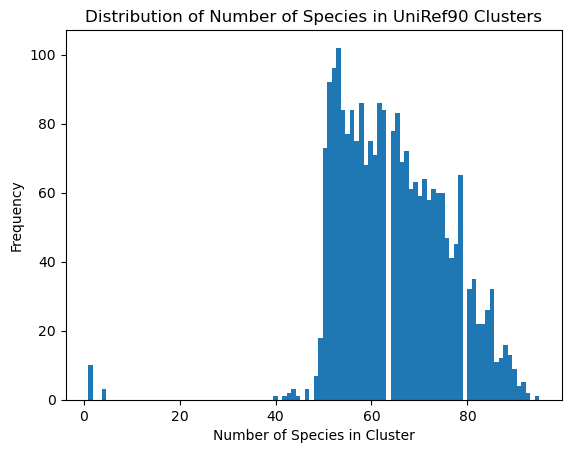

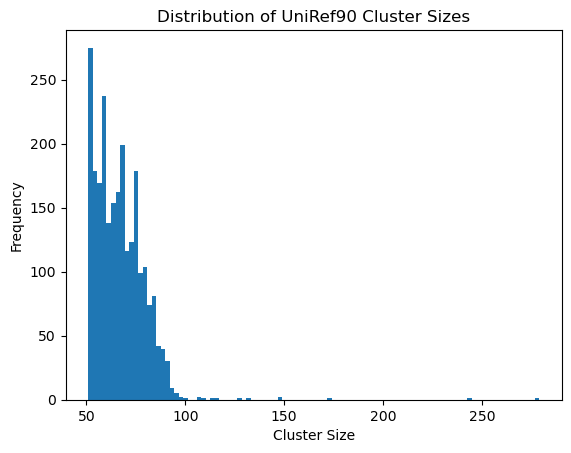

In [ ]:
import matplotlib.pyplot as plt

plt.hist(species_counts_dist, bins=100)
plt.xlabel('Number of Species in Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Species in UniRef90 Clusters')
plt.show()

plt.hist(cluster_counts, bins=100)
plt.xlabel('Cluster Size')
plt.ylabel('Frequency')
plt.title('Distribution of UniRef90 Cluster Sizes')
plt.show()

In [ ]:
sorted(species_counts_dist)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 40,
 42,
 43,
 43,
 44,
 44,
 44,
 45,
 47,
 47,
 47,
 48,
 48,
 48,
 48,
 48,
 48,
 48,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 50,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51,
 51

In [ ]:
filtered_clusters = pd.read_csv("../uniref/filtered_uniref90.txt", header=None)
filtered = filtered_clusters.merge(pd.read_csv("../uniref/uniref_species_count.csv", header=None), how="left", on=0)


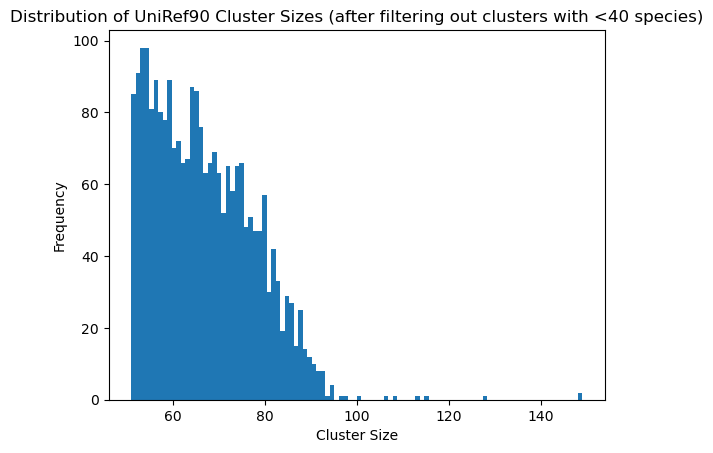

: 

In [ ]:
plt.hist(filtered[1], bins=100)
plt.xlabel('Cluster Size')
plt.ylabel('Frequency')
plt.title('Distribution of UniRef90 Cluster Sizes (after filtering out clusters with <40 species)')
plt.show()

# Model

In [1]:
# # Load Uniprot ID, Binomial, and Brain size data
# brainsize_data = pd.read_csv("../gyz043_suppl_Supplement_Data.csv")
# uniprot_file = "../github_stuff/uniprot_table.txt"
# uniprot_df = pd.read_csv(uniprot_file, sep = "\t")
# uniprot_df = uniprot_df[~uniprot_df['SUPERREGNUM'].isin(['bacteria', 'viruses', 'archaea'])]
# # uniprot_df.shape
# uniprot_df['Species Name'] = uniprot_df['Species Name'].str.replace(r'\(.*?\)', '', regex=True)
# uniprot_df['Species Name'] = uniprot_df['Species Name'].str.replace(r'\d+', '', regex=True)
# uniprot_df['Species Name'] = uniprot_df['Species Name'].str.lower()


# brainsize_data['Binomial'] = brainsize_data['Binomial'].str.replace('_', ' ')
# brainsize_data['Binomial'] = brainsize_data['Binomial'].str.lower()
# brainsize_list = []
# for i, row in brainsize_data.iterrows():
#     binomial = row['Binomial']
#     brain_resid = row['Brain.resid']
#     match = uniprot_df[uniprot_df['Species Name'].str.contains(binomial)]
#     # if len(match) > 0:
#     #     brainsize[binomial] = brain_resid
#     if len(match) > 0:
#         uniprot_id = match.iloc[0]['Proteome_ID']  # Assuming 'UniProt ID' is the column name in uniprot_df
#         brainsize_list.append({
#             'uniprot_id': uniprot_id,
#             'binomial': binomial,
#             'brainsize': brain_resid
#         })

# brainsize = pd.DataFrame(brainsize_list, columns=['uniprot_id', 'binomial', 'brainsize'])
# brainsize.head()

In [2]:
# brainsize.to_csv('brainsize_data.csv', index=False)

## Necessary Functions

In [3]:
import os
import torch
import h5py
import re
import pandas as pd
import csv
import time
import regex as re

def save_embedding(input_embeddings, output_file):
    tensors = {}    
    for root, dirs, files in os.walk(input_embeddings, topdown=True):
        for name in files:
            data = torch.load(os.path.join(root, name))
            tensors[re.findall(r"(UP.*.fasta)", root)[0] + "/" + name] = data['mean_representations'][6]
    print(f"Loaded embeddings from {input_embeddings}") 

    with h5py.File(output_file, 'w') as f:
        for key, tensor in tensors.items():
            f.create_dataset(key, data=tensor.numpy())
    print(f"Saved {len(tensors.keys())} embeddings to {output_file}")
    return tensors

def load_embeddings(input_file):
    tensors = {}
    with h5py.File(input_file, 'r') as f:
        def recursively_load_group(group, prefix=''):
            for key in group.keys():
                item = group[key]
                if isinstance(item, h5py.Group):
                    recursively_load_group(item, prefix + key + '/')
                else:
                    tensors[prefix + key] = torch.tensor(item[()])

        recursively_load_group(f)
    return tensors

def load_csv_into_dict(input_file):
    data_dict = {}
    with open(input_file, "r") as f:
        reader = csv.reader(f, delimiter=',', quotechar="'")        
        for row in reader:
            key = row[0]
            value = row[1]
            data_dict[key] = value
    return data_dict

In [4]:
# Dataloader
import torch
from torch.utils.data import DataLoader, Dataset
import os
import json


In [5]:
# # Before loading into dataset
# # 1. load in all embeddings into h5 file
#     # best if you create a list of file names (per cluster) and read in one by one
# # 2. read in necessary dataframes

# uniprot_species = load_csv_into_dict("/home/gluetown/brain/clusters/uniprot_species.csv")
# filenames_uniprot = load_csv_into_dict("/home/gluetown/brain/clusters/filenames_uniprot_id.csv")
# uniprot_uniref = load_csv_into_dict("/home/gluetown/brain/uniref/uniref90_mapped.csv")
# uniprot_species_df = pd.DataFrame(list(uniprot_species.items()), columns=['uniprot_id', 'species_id'])
# filenames_uniprot_df = pd.DataFrame(list(filenames_uniprot.items()), columns=['filename', 'uniprot_id'])
# uniprot_uniref_df = pd.DataFrame(list(uniprot_uniref.items()), columns=['uniprot_id', 'cluster_id'])
# brainsize_data = pd.read_csv("../gyz043_suppl_Supplement_Data.csv")
# # species_brainsize = {i:brainsize_data.loc[brainsize_data['uniprot_id'] == i.split("_")[0]]['brainsize'].values[0] for i in list(sorted(self.tensors.keys()))}
# up_id_species = pd.read_csv("../clusters/up_id_species.csv", header=None)
# brainsize_data['Binomial'] = brainsize_data['Binomial'].str.lower()
# brainsize_species = {i:brainsize_data.loc[brainsize_data['Binomial'] == up_id_species.loc[up_id_species[0] == i].values[0][1]]['Brain.resid'].values[0] for i in list(sorted(tensors.keys()))}
# up_id_species_df = pd.read_csv("/home/gluetown/brain/clusters/up_id_species.txt", header=None, delimiter="\t")
# up_id_species_df.columns = ['species_id', 'species_name']
# up_id_species_df.head()

## Dataloader

In [6]:
# # Assuming the ESM2EmbeddingDataset class is defined in the same script or imported

# # Sample input files and data
# input_file = "test/test_embeddings.h5"
# uniprot_species = load_csv_into_dict("/home/gluetown/brain/clusters/uniprot_species.csv")
# uniprot_uniref = load_csv_into_dict("/home/gluetown/brain/uniref/uniref90_mapped.csv")
# uniprot_species_df = pd.DataFrame(list(uniprot_species.items()), columns=['uniprot_id', 'species_id'])
# cluster_df = pd.DataFrame(list(uniprot_uniref.items()), columns=['uniprot_id', 'cluster_id'])
# brainsize_data = pd.read_csv("../gyz043_suppl_Supplement_Data.csv")
# up_id_species = pd.read_csv("../clusters/up_id_species.csv", header=None)
# brainsize_data['Binomial'] = brainsize_data['Binomial'].str.lower()
# up_ids = list(set([i.split("/")[0] for i in tensors.keys()]))
# brainsize_species = pd.DataFrame(list(brainsize_species.items()), columns=['species_id', 'brainsize'])

# class ESM2DataSet(Dataset):
#     def __init__(self, input_file, meta_df, cluster_df):
#         self.tensors = load_embeddings(input_file) # {filename:tensor}
#         self.meta_df = meta_df[meta_df['filename'].isin(self.tensors.keys())]
#         self.cluster_df = cluster_df # {uniprot_id:cluster}
        
#     def __len__(self):
#         return len(self.tensors)
    
#     def __getitem__(self, idx):
#         filename = self.meta_df.iloc[idx]['filename']
#         tensor = self.tensors[filename]
#         brainsize = self.meta_df.iloc[idx]['Brain.resid']
#         return filename, tensor, brainsize


In [23]:
import os
import re
import torch
import h5py

def load_embeddings(file_path):
    # Assuming this function loads embeddings from an h5 file and returns a dictionary
    with h5py.File(file_path, 'r') as f:
        return {key: torch.tensor(value) for key, value in f.items()}

def initialize_input(input_dir):
    padded_tensors = []
    tensor_to_species = []
    species_to_gene = {}
    tensors_names = []
    max_length = 0

    # Single pass to determine the maximum length, pad tensors, and populate lists
    for file in sorted(os.listdir(input_dir)):
        print("Loading file:", file)
        if file.endswith("h5"):
            species_id = file.split(".h5")[0]
            tensor_to_species.append(species_id)
            name = re.findall(r"(UP.*.fasta)", file)[0]
            tensor = load_embeddings(os.path.join(input_dir, file))
            tensor_values = list(tensor.values())
            current_length = len(tensor_values)
            max_length = max(max_length, current_length)
            
            # Pad the tensor to the current maximum length
            padded_tensor = torch.zeros((max_length, *tensor_values[0].shape))
            for i, t in enumerate(tensor_values):
                padded_tensor[i] = t
            padded_tensors.append(padded_tensor)
            
            with open(os.path.join(input_dir, name + "_keys.txt"), "r") as f:
                tensors_names.append([i.strip() for i in f.readlines()])
            species_to_gene[name] = tensors_names

    stacked_tensors = torch.stack(padded_tensors)

    return stacked_tensors, tensor_to_species, species_to_gene

input_dir = "/home/gluetown/brain/data/concat_tensors/"
tensors, tensor_to_species, species_to_gene = initialize_input(input_dir)

In [ ]:
import os
import re
import torch
import h5py

def load_embeddings(file_path):
    # Assuming this function loads embeddings from an h5 file and returns a dictionary
    with h5py.File(file_path, 'r') as f:
        return {key: torch.tensor(value) for key, value in f.items()}

def initialize_input(input_dir):
    tensors = []
    tensor_to_species = []
    species_to_gene = {}
    tensors_names = []
    max_length = 0

    # First pass to determine the maximum length
    for file in sorted(os.listdir(input_dir)):
        if file.endswith("h5"):
            tensor_to_species.append(file.split(".h5")[0])
            name = re.findall(r"(UP.*.fasta)", file)[0]
            tensor = load_embeddings(input_dir + file)
            tensor_values = list(tensor.values())
            max_length = max(max_length, len(tensor_values))
            tensors.append(tensor_values)
            with open(input_dir + name + "_keys.txt", "r") as f:
                tensors_names.append([i.strip() for i in f.readlines()])
            species_to_gene[name] = tensors_names

    # Second pass to pad tensors and stack them
    padded_tensors = []
    for tensor_values in tensors:
        padded_tensor = torch.zeros((max_length, *tensor_values[0].shape))
        for i, t in enumerate(tensor_values):
            padded_tensor[i] = t
        padded_tensors.append(padded_tensor)

    stacked_tensors = torch.stack(padded_tensors)

    return stacked_tensors, tensor_to_species, species_to_gene

input_dir = "/home/gluetown/brain/data/concat_tensors/"
tensors, tensor_to_species, species_to_gene = initialize_input(input_dir)

In [9]:
# Encoder Model
# input: tensor of concatenated tensors for each species
class ESM2_Concat(Dataset):
    def __init__(self, tensors, tensor_to_species, meta_df, cluster_df):
        self.tensors = tensors # tensor of concatenated tensors for each species
        self.tensor_to_species = tensor_to_species # list of species corresponding to each tensor
        self.meta_df = meta_df[meta_df['species_id'].isin(self.tensor_to_species)]
        self.cluster_df = cluster_df # {uniprot_id:cluster}
        
    def __len__(self):
        return len(self.tensors)
    
    def __getitem__(self, idx):
        species_id = self.tensor_to_species[idx]
        tensor = self.tensors[idx]
        brainsize = self.meta_df.loc[self.meta_df["species_id"] == species_id]['Brain.resid'].iloc[0]
        return tensor, brainsize, species_id

In [10]:
# Data loader
import pandas as pd
from torch.utils.data import Dataset, DataLoader

meta_df = pd.read_csv("../data/metadata.csv.gz", compression = "gzip")
uniprot_uniref = load_csv_into_dict("/home/gluetown/brain/uniref/uniref90_mapped.csv")
cluster_df = pd.DataFrame(list(uniprot_uniref.items()), columns=['uniprot_id', 'cluster_id'])
input_file = "test/test_embeddings.h5"


In [11]:
dataset = ESM2_Concat(tensors, tensor_to_species, meta_df, cluster_df)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [12]:
# TESTING DATALOADER
# # Retrieve and print a few items from the dataset
# for i, (tensor, brainsize, species_id) in enumerate(dataloader):
#     print(f"Item {i}:")
#     print(f"Tensor: {tensor}")
#     print(f"Brainsize: {brainsize}")
#     print(f"species_id: {species_id}")

#     if i == 2:  # Print only the first 3 batches
#         break

Item 0:
Tensor: tensor([[-0.0919,  0.0092,  0.4586,  ...,  0.3177, -0.1830,  0.0560],
        [-0.0919,  0.0092,  0.4586,  ...,  0.3177, -0.1830,  0.0560]])
Brainsize: tensor([0.2425, 0.2479], dtype=torch.float64)
species_id: ('UP000008225_9483.fasta', 'UP000002494_10116.fasta')
Item 1:
Tensor: tensor([[-0.0919,  0.0092,  0.4586,  ...,  0.3177, -0.1830,  0.0560]])
Brainsize: tensor([-0.0222], dtype=torch.float64)
species_id: ('UP000000589_10090.fasta',)


## Training and Testing

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.tensorboard import SummaryWriter
# from torchvision import datasets, transforms

# Dataset class
class ESM2_Concat(Dataset):
    def __init__(self, tensors, tensor_to_species, meta_df, cluster_df):
        self.tensors = tensors  # tensor of concatenated tensors for each species
        self.tensor_to_species = tensor_to_species  # list of species corresponding to each tensor
        self.meta_df = meta_df[meta_df['species_id'].isin(self.tensor_to_species)]
        self.cluster_df = cluster_df  # {uniprot_id:cluster}
        
    def __len__(self):
        return len(self.tensors)
    
    def __getitem__(self, idx):
        species_id = self.tensor_to_species[idx]
        tensor = self.tensors[idx]
        brainsize = self.meta_df.loc[self.meta_df["species_id"] == species_id]['Brain.resid'].iloc[0]
        return tensor, brainsize, species_id

# Encoder model
class EncoderModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(EncoderModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Assuming tensors, tensor_to_species, meta_df, and cluster_df are already defined
dataset = ESM2_Concat(tensors, tensor_to_species, meta_df, cluster_df)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define model, loss function, and optimizer
input_dim = tensors.shape[1]  # Assuming tensors is a 2D tensor
hidden_dim = 128
output_dim = 1
model = EncoderModel(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Writer will output to ./runs/ directory by default
writer = SummaryWriter()

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    epoch_loss = 0
    for batch in dataloader:
        tensors, brainsizes, _ = batch
        tensors = tensors.float()
        brainsizes = brainsizes.float().unsqueeze(1)
        
        # Forward pass
        outputs = model(tensors)
        loss = criterion(outputs, brainsizes)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(dataloader)
    writer.add_scalar('Loss/train', avg_loss, epoch)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

writer.close()
print("Training complete.")

Epoch [1/10], Loss: 0.0315
Epoch [2/10], Loss: 5.2754
Epoch [3/10], Loss: 0.5558
Epoch [4/10], Loss: 0.0335
Epoch [5/10], Loss: 0.0337
Epoch [6/10], Loss: 0.0338
Epoch [7/10], Loss: 0.0339
Epoch [8/10], Loss: 0.0340
Epoch [9/10], Loss: 0.0340
Epoch [10/10], Loss: 0.0341
Training complete.


In [ ]:
rm -r ./runs

rm: cannot remove './runs': No such file or directory


In [15]:
from torch.utils.tensorboard import SummaryWriter
# from torchvision import datasets, transforms

# Writer will output to ./runs/ directory by default
writer = SummaryWriter()

In [17]:
tensorboard --logdir=runs

SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (3224537314.py, line 1)

## MIL

In [ ]:
# Instance Level

class ESM2EmbeddingDataset(Dataset):
    def __init__(self, cluster_dir, brainsize_data):
        self.cluster_dir = cluster_dir
        tmp = self.load_tensors_from_json(cluster_dir)
        self.species_brainsize = {i:brainsize_data.loc[brainsize_data['uniprot_id'] == i.split("_")[0]]['brainsize'].values[0] for i in list(sorted(tmp.keys()))}
        # self.embeddings = tmp.values()
        # self.embedding_labels = tmp.keys()
        self.labels = [] # list of lists, where each inner list is the list of protein names
        # order of labels is the same as order in species
        self.embeddings = []
        self.max_emb = max([len(i) for i in tmp.values()]) # number of tensors to pad 
        for sp, val in tmp.items():
            tmp_embeddings = list(val.values())
            self.labels.append(list(val.keys()))
            # concat embeddings together and pad so they're all the same length 
            # as the longest (most proteins in a species)
            if len(tmp_embeddings) < self.max_emb:
                for _ in range(self.max_emb - len(tmp_embeddings)):
                    tmp_embeddings.append(torch.empty((320,)))
            self.embeddings.append(torch.cat(tmp_embeddings, axis=1))
        self.correlation_score = np.random.rand(len(self.embedding_labels))
        self.correlation_score = np.random.rand((len(self.embedding_labels)))
        self.brainsize = brainsize_data.loc[brainsize_data['uniprot_id'] == self.embedding_labels.split("_")[0]]['brainsize'].values[0]

    def __len__(self):
        return len(self.embedding_labels)

    def __getitem__(self, idx):
        # returns all the embeddings, associated brain size, and labels for one species at a time
        return self.embeddings[idx], self.species_brainsize[self.embeddings[idx]], self.labels[idx]
        
        # return embedding and brain size of corresponding species
        return self.embeddings[idx], embedding_labels[idx]

        # should i return all the embeddings for a species in a cluster all at once?
        return self.embeddings[idx].values(), embedding_labels[idx]
            # if so: need to get species w/ most genes, collate, pad the other species with however many genes x 320
    
    def load_tensors_from_json(self, base_dir):
        cluster_dict = {}        
        for cluster_dir in os.listdir(base_dir):
            cluster_path = os.path.join(base_dir, cluster_dir)
            if os.path.isdir(cluster_path):
                cluster_key = cluster_dir.split('.fasta')[0]
                cluster_dict[cluster_key] = {}                
                for json_file in os.listdir(cluster_path):
                    if json_file.endswith('.json'):
                        file_path = os.path.join(cluster_path, json_file)
                        with open(file_path, 'r') as f:
                            data = json.load(f)
                            tensor = torch.tensor(data)
                            sub_key = os.path.splitext(json_file)[0]
                            cluster_dict[cluster_key][sub_key] = tensor
        return cluster_dict



def ESMDataLoader(cluster_dir, batch_size):
    brainsize_data = pd.read_csv("./brainsize_data.csv")
    dataset = ESM2EmbeddingDataset(cluster_dir, brainsize_data)
    if is_train:
        return DataLoader(dataset, batch_size=batch_size, shuffle=True)
    else:
        return DataLoader(dataset, batch_size=batch_size, shuffle=False)


batch_size = 64

# data_dir = 'path/to/your/esm2/embeddings'
# dataset = ESM2EmbeddingDataset(data_dir)
# dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# for batch in dataloader:
#     # Your training code here
#     print(batch.shape)

In [ ]:
for x, y, z in ESMDataLoader("cluster_1", batch_size):
    # print(x.shape, y.shape, z.shape)
    print(x, y, z)
    break

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

### Models ###

class InstanceModel(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(InstanceModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return x

class BagModel(nn.Module):
    def __init__(self, hidden_dim, output_dim):
        super(BagModel, self).__init__()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc2(x)
        return x

class MILModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MILModel, self).__init__()
        self.instance_model = InstanceModel(input_dim, hidden_dim)
        self.bag_model = BagModel(hidden_dim, output_dim)

    def forward(self, x):
        # x is a list of tensors (instances in a bag)
        instance_outputs = [self.instance_model(instance) for instance in x]
        instance_outputs = torch.stack(instance_outputs)
        
        # Aggregation function (max pooling)
        bag_output, _ = torch.max(instance_outputs, dim=0)
        
        # Bag-level model
        bag_output = self.bag_model(bag_output)
        return bag_output

In [ ]:
import torch.optim as optim

### Training ###

# Hyperparameters
input_dim = 320  # Example input dimension
hidden_dim = 128
output_dim = 1
learning_rate = 0.001
num_epochs = 10

# Initialize dataset and dataloader
data_dir = 'path/to/your/esm2/embeddings'
dataset = ESM2EmbeddingDataset(data_dir)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Initialize model, loss function, and optimizer
model = MILModel(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for embeddings, correlation_score in dataloader:
        # Flatten the list of tensors into a single tensor
        embeddings = [embedding.squeeze(0) for embedding in embeddings]
        
        # Forward pass
        outputs = model(embeddings)
        loss = criterion(outputs, correlation_score)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')